In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
annual_crime = pd.read_pickle('data/pickled/annual_crime.pkl')
monthly_crime = pd.read_pickle('data/pickled/monthly_crime.pkl')

In [4]:
annual_crime.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,19373,17987,17758,16636,16049,18190,18881,19393,19131
1,15999,14661,15317,14037,13661,15981,17284,17057,17024
2,18107,16922,16563,16177,15576,17963,18224,19336,18915
3,17748,16420,16276,15699,15404,16904,18570,18683,19026
4,17699,16923,17468,16573,16695,17890,19002,19366,19822


In [5]:
monthly_crime.head()

,crime_count
Date,
2010-01-01,19373
2010-02-01,15999
2010-03-01,18107
2010-04-01,17748
2010-05-01,17699


### Modeling on monthly crime dataframe

#### Trend Analysis in Data

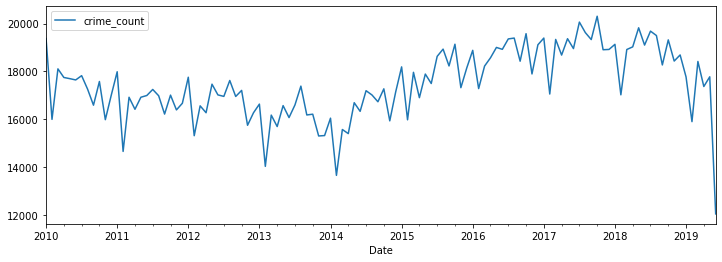

In [23]:
monthly_crime.plot(figsize=(12,4))

From the plot, there seems to be a some periodic trend and some seasonality, also a trend that goes up from 2014 to 2018 and a falling trend from there on. Although, we only have data on the first eight months of 2019, data collection during 2019 seems to be lacking or there truly was falling numbers of crime

Due to the presence of trend, our data is not stationary, the mean is defintely not constant. We can look at the rolling statistics (rolling mean and roilling standard deviation) to confirm.

#### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean at any point in time **$t$**, we can take the average/variance of the **$w$** last time periods. **$w$** is then known as the window size.

In [7]:
roll_mean = monthly_crime.rolling(window=8, center=False).mean()
roll_std = monthly_crime.rolling(window=8, center=False).std()

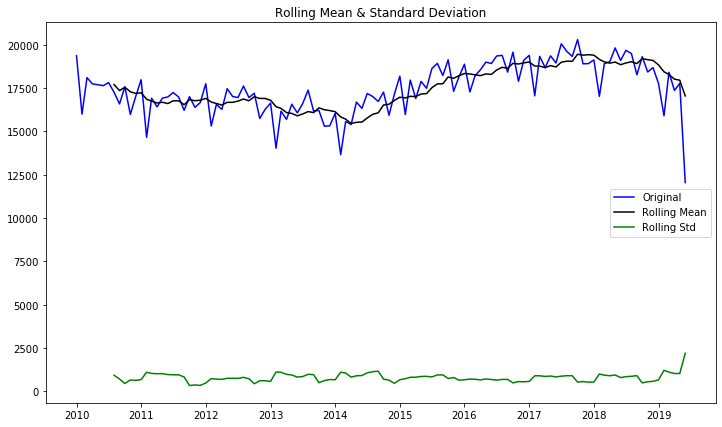

In [8]:
fig = plt.figure(figsize=(12,7))
plt.plot(monthly_crime, color='blue', label='Original')
plt.plot(roll_mean, color='black', label='Rolling Mean')
plt.plot(roll_std, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The black and green lines represent the rolling mean and rolling standard deviations. In the plot we can see that mean is not constant over time, so we can confirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

In [9]:
X = monthly_crime['crime_count']
X = X[np.logical_not(np.isnan(X))]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=16619.421053, mean2=18350.035088
variance1=982450.498120, variance2=1759541.748747


As you can see the mean is not constant and the variance is also changing

In [49]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(monthly_crime)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.903371
p-value                          0.330477
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

At a 95% confidence, we fail to reject the null that the monthly crime data is not stationary.

In [18]:
monthly_crime.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', length=114, freq='MS')

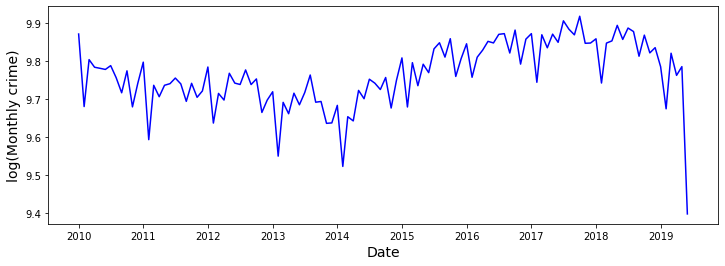

In [29]:
data = pd.Series(np.log(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

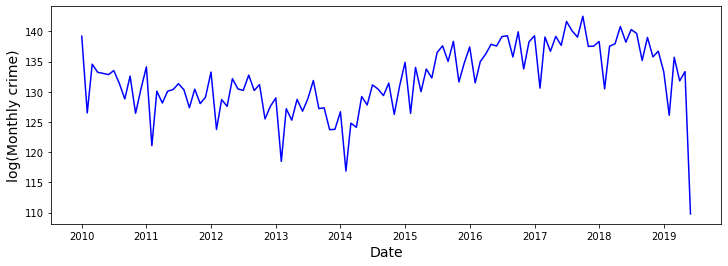

In [30]:
data1 = pd.Series(np.sqrt(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data1, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

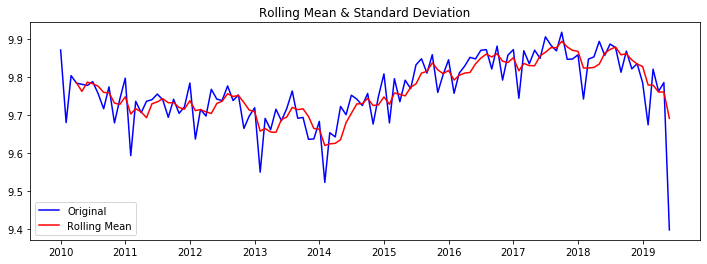

In [31]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [32]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

Date
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01   -0.000972
2010-05-01    0.018857
2010-06-01   -0.008681
2010-07-01    0.005309
2010-08-01   -0.019645
2010-09-01   -0.043246
2010-10-01    0.015578
2010-11-01   -0.052276
2010-12-01    0.013429
2011-01-01    0.049197
2011-02-01   -0.109868
2011-03-01    0.019330
Freq: MS, Name: crime_count, dtype: float64

In [33]:
data_minus_roll_mean.dropna(inplace=True)

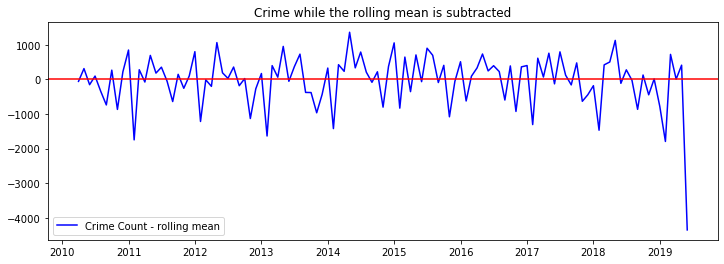

In [44]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [50]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  0.027720
p-value                         0.960765
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

p value is greater than p critical at 0.05. Fail to Reject null of Not Stationary. The rolling mean subtracted log crime count data is not stationary

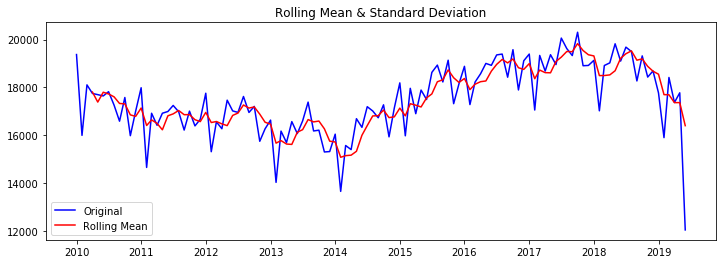

In [51]:
roll_mean = monthly_crime.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(monthly_crime, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [52]:
# Subtract the moving average from the original data
data_minus_roll_mean = monthly_crime - roll_mean
data_minus_roll_mean.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,-58.75
2010-05-01,310.75
2010-06-01,-154.75
2010-07-01,94.25
2010-08-01,-343.75
2010-09-01,-739.75


In [53]:
data_minus_roll_mean.dropna(inplace=True)

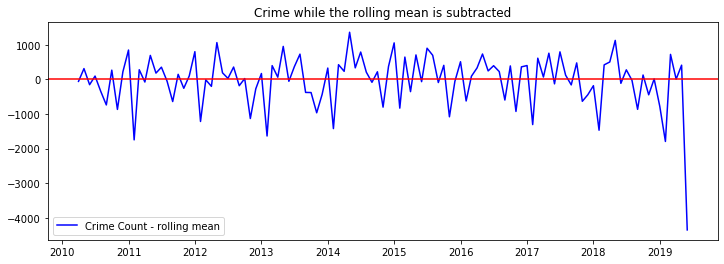

In [54]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [55]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  0.027720
p-value                         0.960765
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

Logged and non logged has no effect once using the rolling mean subtraction. Still not stationary.

In [56]:
crime_diff = monthly_crime.diff(periods=1)
crime_diff.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,-3374.0
2010-03-01,2108.0
2010-04-01,-359.0
2010-05-01,-49.0
2010-06-01,-54.0
2010-07-01,178.0
2010-08-01,-559.0
2010-09-01,-673.0


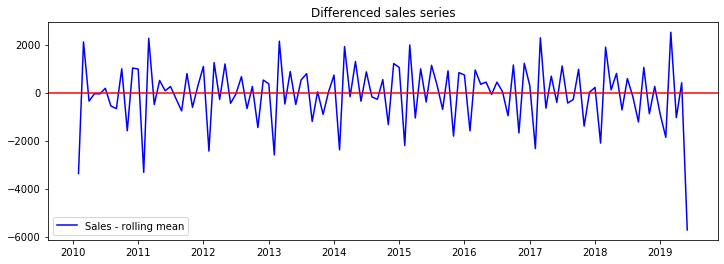

In [57]:
fig = plt.figure(figsize=(12,4))
plt.plot(crime_diff, color='blue',label='Sales - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [59]:
crime_diff.dropna(inplace=True)

In [60]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(crime_diff)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -0.095305
p-value                          0.949904
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

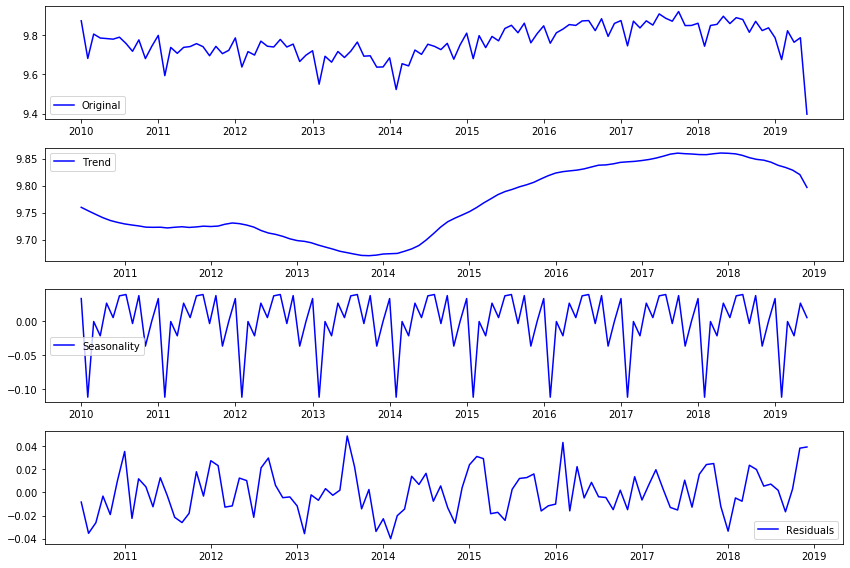

In [62]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(monthly_crime))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(monthly_crime), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [64]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

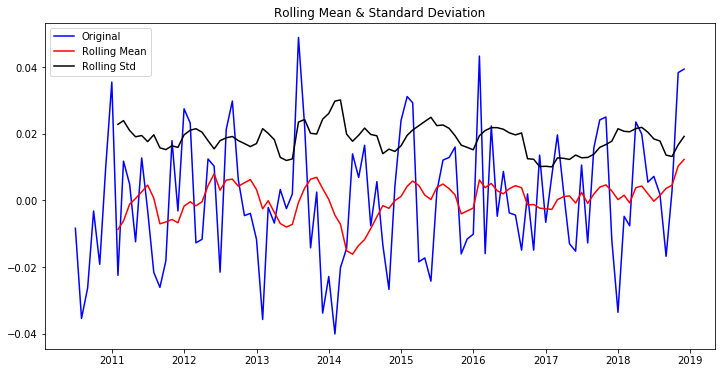

Results of Dickey-Fuller Test: 

Test Statistic                -6.673725e+00
p-value                        4.519958e-09
#Lags Used                     4.000000e+00
Number of Observations Used    9.700000e+01
Critical Value (1%)           -3.499637e+00
Critical Value (5%)           -2.891831e+00
Critical Value (10%)          -2.582928e+00
dtype: float64


In [65]:
# Drop missing values from residuals 
crime_log_decompose = residual
crime_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(crime_log_decompose)

Residuals are stationary at a 95% confidence

>The p statistic is significant and below 0.05 . So it seems reasonable to assume this time series is stationary.

*"In time series context, residuals must be stationary in order to avoid spurious regressions (Woolridge, 2012), if there are no properties of
stationarity among the residuals, then basically our results tend to produce
fake relationships in our model."*

#### Comparing the crime count time series, with the time series of a lag of one

In [80]:
crime_shift_1 = monthly_crime.shift(periods=1)
lag_1 = pd.concat([crime_shift_1, monthly_crime], axis=1)
lag_1.corr()

,crime_count,crime_count
crime_count,1.000000,0.573987
crime_count,0.573987,1.000000


In [83]:
for i in range(1,14):
    crime_shift = monthly_crime.shift(periods=i)
    lag = pd.concat([crime_shift, monthly_crime], axis=1)
    print('lag {}'.format(i), lag.corr())

lag 1              crime_count  crime_count
crime_count     1.000000     0.573987
crime_count     0.573987     1.000000
lag 2              crime_count  crime_count
crime_count     1.000000     0.682073
crime_count     0.682073     1.000000
lag 3              crime_count  crime_count
crime_count     1.000000     0.619881
crime_count     0.619881     1.000000
lag 4              crime_count  crime_count
crime_count      1.00000      0.56933
crime_count      0.56933      1.00000
lag 5              crime_count  crime_count
crime_count     1.000000     0.575759
crime_count     0.575759     1.000000
lag 6              crime_count  crime_count
crime_count     1.000000     0.436754
crime_count     0.436754     1.000000
lag 7              crime_count  crime_count
crime_count     1.000000     0.533619
crime_count     0.533619     1.000000
lag 8              crime_count  crime_count
crime_count       1.0000       0.4142
crime_count       0.4142       1.0000
lag 9              crime_count  crime_co

autocorrelation highest at lag 2 and lag 13 also visible in the peaks in the autocorrelation plot below

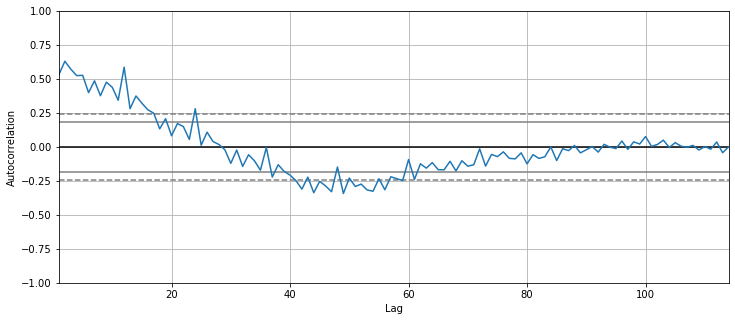

In [84]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(monthly_crime);

From the plot, we can see that there are peaks at intervals of 12. The statistical significance falls around 15 to 16 lags.

MA(k)--- ACF strong autocorrelation till lag 16, with peaks at lag 2 and 12

AR(k)--- ACF stong to a lag of 12

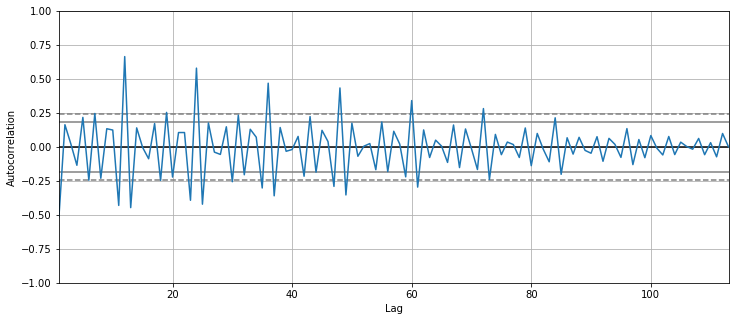

In [90]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(crime_diff);

The ACF on the (1)differenced data seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 12 seems consistently statistically significant, while it decays for longer time lags!

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. MA(k), k 60?

we would expect the ACF for the AR(k) process to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect is weakened.--- strong to a lag of 48 or 60?

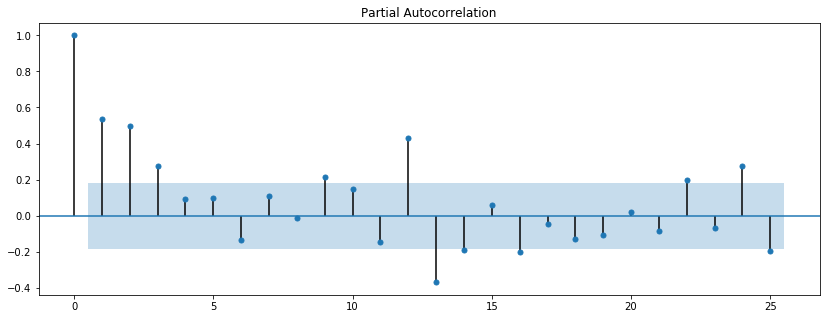

In [91]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(monthly_crime, lags=25);

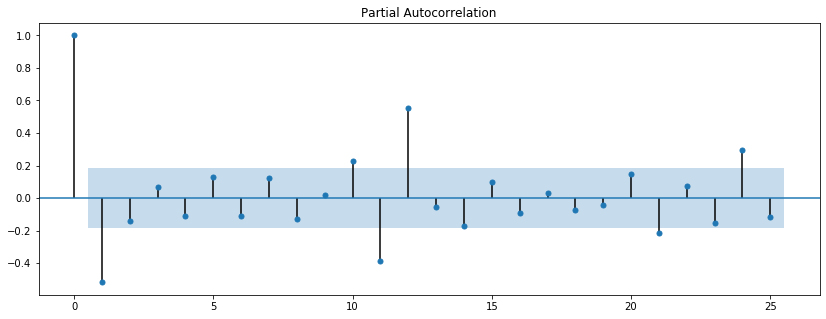

In [92]:
plot_pacf(crime_diff, lags=25);

### AR Model--- ARMA(#,0)

In [95]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(1, 0)   Log Likelihood                -968.877
Method:                       css-mle   S.D. of innovations           1185.509
Date:                Sun, 06 Dec 2020   AIC                           1943.754
Time:                        02:08:13   BIC                           1951.963
Sample:                    01-01-2010   HQIC                          1947.086
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.744e+04    282.596     61.705      0.000    1.69e+04     1.8e+04
ar.L1.crime_count     0.6118      0.082      7.490      0.000       0.452       0.772
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6345           +0.0000j            1.6345            0.0000
-----------------------------------------------------------------------------
"""

In [96]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -952.785
Method:                       css-mle   S.D. of innovations           1026.306
Date:                Sun, 06 Dec 2020   AIC                           1913.571
Time:                        02:09:09   BIC                           1924.516
Sample:                    01-01-2010   HQIC                          1918.013
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.734e+04    487.664     35.551      0.000    1.64e+04    1.83e+04
ar.L1.crime_count     0.2462      0.091      2.691      0.007       0.067       0.426
ar.L2.crime_count     0.5667      0.092      6.167      0.000       0.387       0.747
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1288           +0.0000j            1.1288            0.0000
AR.2           -1.5633           +0.0000j            1.5633            0.5000
-----------------------------------------------------------------------------
"""

In [97]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(12,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(12, 0)   Log Likelihood                -931.071
Method:                       css-mle   S.D. of innovations            828.012
Date:                Sun, 06 Dec 2020   AIC                           1890.143
Time:                        02:09:42   BIC                           1928.449
Sample:                    01-01-2010   HQIC                          1905.689
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.736e+04    658.025     26.386      0.000    1.61e+04    1.87e+04
ar.L1.crime_count      0.2748      0.103      2.659      0.008       0.072       0.477
ar.L2.crime_count      0.3559      0.099      3.595      0.000       0.162       0.550
ar.L3.crime_count      0.1880      0.111      1.697      0.090      -0.029       0.405
ar.L4.crime_count      0.0791      0.105      0.755      0.450      -0.126       0.285
ar.L5.crime_count     -0.0675      0.118     -0.573      0.566      -0.298       0.163
ar.L6.crime_count     -0.1761      0.102     -1.721      0.085      -0.377       0.024
ar.L7.crime_count      0.0403      0.115      0.351      0.726      -0.185       0.265
ar.L8.crime_count      0.0236      0.109      0.216      0.829      -0.190       0.238
ar.L9.crime_count      0.1838      0.110      1.669      0.095      -0.032       0.400
ar.L10.crime_count    -0.1140      0.108     -1.053      0.292      -0.326       0.098
ar.L11.crime_count    -0.3729      0.100     -3.746      0.000      -0.568      -0.178
ar.L12.crime_count     0.4918      0.100      4.935      0.000       0.296       0.687
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0611           -0.0000j            1.0611           -0.5000
AR.2            -0.8907           -0.4948j            1.0189           -0.4193
AR.3            -0.8907           +0.4948j            1.0189            0.4193
AR.4            -0.4902           -0.9107j            1.0343           -0.3286
AR.5            -0.4902           +0.9107j            1.0343            0.3286
AR.6             0.0586           -1.0307j            1.0324           -0.2410
AR.7             0.0586           +1.0307j            1.0324            0.2410
AR.8             0.7094           -0.9048j            1.1498           -0.1442
AR.9             0.7094           +0.9048j            1.1498            0.1442
AR.10            1.0257           -0.0000j            1.0257           -0.0000
AR.11            1.0097           -0.4176j            1.0927           -0.0624
AR.12            1.0097           +0.4176j            1.0927            0.0624
------------------------------------------------------------------------------
"""

In [98]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(1, 0)   Log Likelihood                -946.827
Method:                       css-mle   S.D. of innovations           1051.058
Date:                Sun, 06 Dec 2020   AIC                           1899.654
Time:                        02:10:22   BIC                           1907.837
Sample:                    02-01-2010   HQIC                          1902.975
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -33.0904     59.896     -0.552      0.581    -150.485      84.304
ar.L1.crime_count    -0.6581      0.086     -7.693      0.000      -0.826      -0.490
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5196           +0.0000j            1.5196            0.5000
-----------------------------------------------------------------------------
"""

In [99]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(2, 0)   Log Likelihood                -942.823
Method:                       css-mle   S.D. of innovations           1013.689
Date:                Sun, 06 Dec 2020   AIC                           1893.646
Time:                        02:11:57   BIC                           1904.556
Sample:                    02-01-2010   HQIC                          1898.073
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -25.1551     44.651     -0.563      0.573    -112.670      62.360
ar.L1.crime_count    -0.8457      0.105     -8.033      0.000      -1.052      -0.639
ar.L2.crime_count    -0.3066      0.106     -2.888      0.004      -0.515      -0.099
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3791           -1.1659j            1.8059           -0.3883
AR.2           -1.3791           +1.1659j            1.8059            0.3883
-----------------------------------------------------------------------------
"""

In [101]:
## Instantiate an AR(1) model to the simulated data
# mod_arma = ARMA(crime_diff, order=(12,0))
# res_arma = mod_arma.fit()
# res_arma.summary()

## Did not converge at p=12

## MA Models == ARMA(0, #)

In [102]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 1)   Log Likelihood                -980.540
Method:                       css-mle   S.D. of innovations           1315.112
Date:                Sun, 06 Dec 2020   AIC                           1967.081
Time:                        02:14:46   BIC                           1975.289
Sample:                    01-01-2010   HQIC                          1970.412
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.747e+04    167.365    104.411      0.000    1.71e+04    1.78e+04
ma.L1.crime_count     0.3619      0.078      4.659      0.000       0.210       0.514
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.7634           +0.0000j            2.7634            0.5000
-----------------------------------------------------------------------------
"""

In [104]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,2))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 2)   Log Likelihood                -967.653
Method:                       css-mle   S.D. of innovations           1171.791
Date:                Sun, 06 Dec 2020   AIC                           1943.306
Time:                        02:15:52   BIC                           1954.251
Sample:                    01-01-2010   HQIC                          1947.748
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.745e+04    197.288     88.451      0.000    1.71e+04    1.78e+04
ma.L1.crime_count     0.2852      0.087      3.282      0.001       0.115       0.456
ma.L2.crime_count     0.5229      0.097      5.384      0.000       0.333       0.713
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2727           -1.3557j            1.3828           -0.2816
MA.2           -0.2727           +1.3557j            1.3828            0.2816
-----------------------------------------------------------------------------
"""

In [105]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,12))
res_arma = mod_arma.fit()
res_arma.summary()

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(0, 12)   Log Likelihood                -932.689
Method:                       css-mle   S.D. of innovations            824.297
Date:                Sun, 06 Dec 2020   AIC                           1893.378
Time:                        02:16:53   BIC                           1931.684
Sample:                    01-01-2010   HQIC                          1908.924
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.734e+04    378.251     45.851      0.000    1.66e+04    1.81e+04
ma.L1.crime_count      0.3746      0.106      3.537      0.000       0.167       0.582
ma.L2.crime_count      0.5286      0.138      3.842      0.000       0.259       0.798
ma.L3.crime_count      0.5237      0.161      3.253      0.001       0.208       0.839
ma.L4.crime_count      0.3741      0.157      2.378      0.017       0.066       0.682
ma.L5.crime_count      0.4467      0.157      2.837      0.005       0.138       0.755
ma.L6.crime_count      0.1787      0.154      1.161      0.246      -0.123       0.480
ma.L7.crime_count      0.4412      0.133      3.326      0.001       0.181       0.701
ma.L8.crime_count      0.1564      0.121      1.297      0.195      -0.080       0.393
ma.L9.crime_count      0.1759      0.111      1.583      0.113      -0.042       0.394
ma.L10.crime_count     0.1441      0.115      1.258      0.208      -0.080       0.369
ma.L11.crime_count     0.0977      0.125      0.782      0.434      -0.147       0.343
ma.L12.crime_count     0.6334      0.111      5.728      0.000       0.417       0.850
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1            -1.0135           -0.2072j            1.0345           -0.4679
MA.2            -1.0135           +0.2072j            1.0345            0.4679
MA.3            -0.6983           -0.7460j            1.0218           -0.3697
MA.4            -0.6983           +0.7460j            1.0218            0.3697
MA.5            -0.2857           -1.0003j            1.0403           -0.2943
MA.6            -0.2857           +1.0003j            1.0403            0.2943
MA.7             0.2292           -0.9734j            1.0000           -0.2132
MA.8             0.2292           +0.9734j            1.0000            0.2132
MA.9             0.6769           -0.7806j            1.0332           -0.1363
MA.10            0.6769           +0.7806j            1.0332            0.1363
MA.11            1.0142           -0.4410j            1.1060           -0.0653
MA.12            1.0142           +0.4410j            1.1060            0.0653
------------------------------------------------------------------------------
"""

In [106]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(0, 1)   Log Likelihood                -946.944
Method:                       css-mle   S.D. of innovations           1051.952
Date:                Sun, 06 Dec 2020   AIC                           1899.889
Time:                        02:17:40   BIC                           1908.071
Sample:                    02-01-2010   HQIC                          1903.209
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -18.3029     33.089     -0.553      0.580     -83.156      46.550
ma.L1.crime_count    -0.6757      0.071     -9.492      0.000      -0.815      -0.536
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4801           +0.0000j            1.4801            0.0000
-----------------------------------------------------------------------------
"""

## ARIMA MODEL

In [108]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [109]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_crime,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =2531.0455716848696
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =2197.6986482708685
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1715.219827358867
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1519.4682225108454
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1734.572630422233
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1717.9935092276562
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =1535.1396273402477
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1521.0199868409547
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =2430.2986144341744
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =2313.981021388584
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1662.167601719685
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1470.8945008977103
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1715.333413811577
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =2146.0630370536096
ARIMA (0, 0

In [110]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (1, 1, 1, 12)
aic           1401.42
Name: 31, dtype: object

In [112]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(monthly_crime, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,-0.1537,0.261,-0.588,0.557,-0.666,0.359
ar.S.L12,-0.5977,0.434,-1.379,0.168,-1.447,0.252
ma.S.L12,0.1760,0.532,0.331,0.741,-0.867,1.219
sigma2,5.281e+05,4.3e+04,12.281,0.000,4.44e+05,6.12e+05


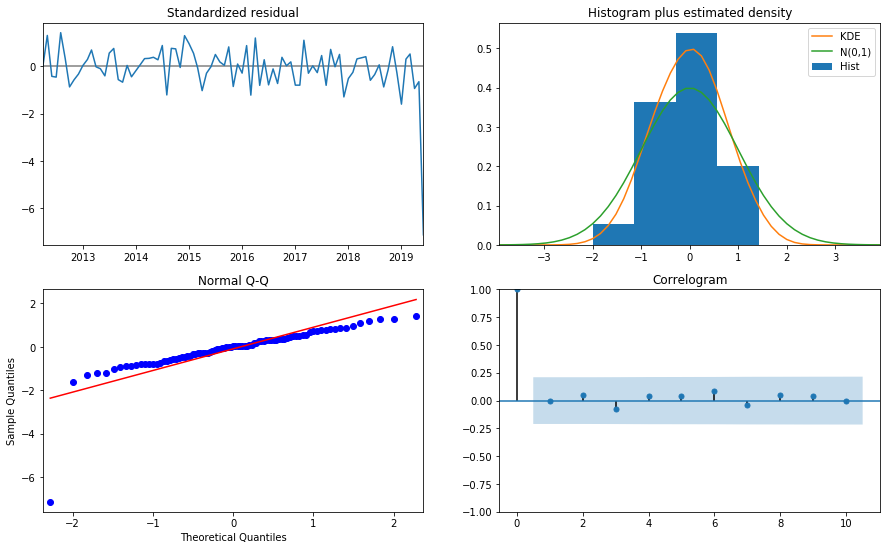

In [118]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 9))
plt.show()

### from canvas lesson

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Checking for these assumptions from diagnostics plots:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) weakly follows the linear trend of the samples taken from a standard normal distribution with N(0, 1).There is fair indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

In [122]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_conf = pred.conf_int()

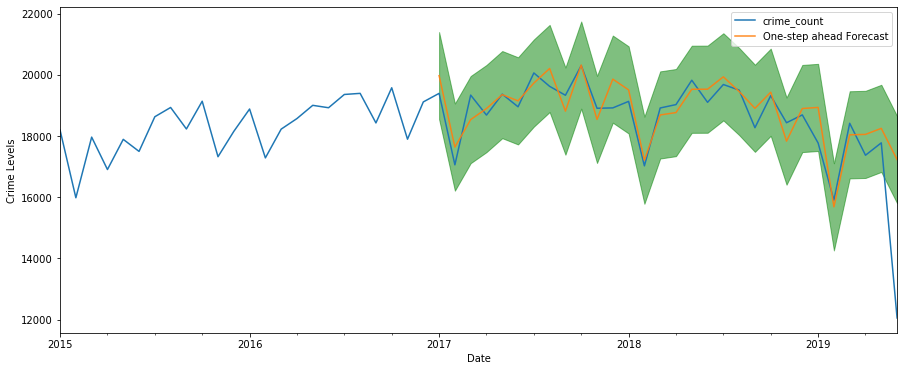

In [125]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = monthly_crime['2015':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')
plt.legend()

plt.show()

In [127]:
# Get the real and predicted values
Crime_forecasted = pred.predicted_mean
Crime_truth = monthly_crime['2017-01-01':]

# Compute the mean square error
mse = ((Crime_forecasted - Crime_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
crime_count           NaN
dtype: float64


In [130]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

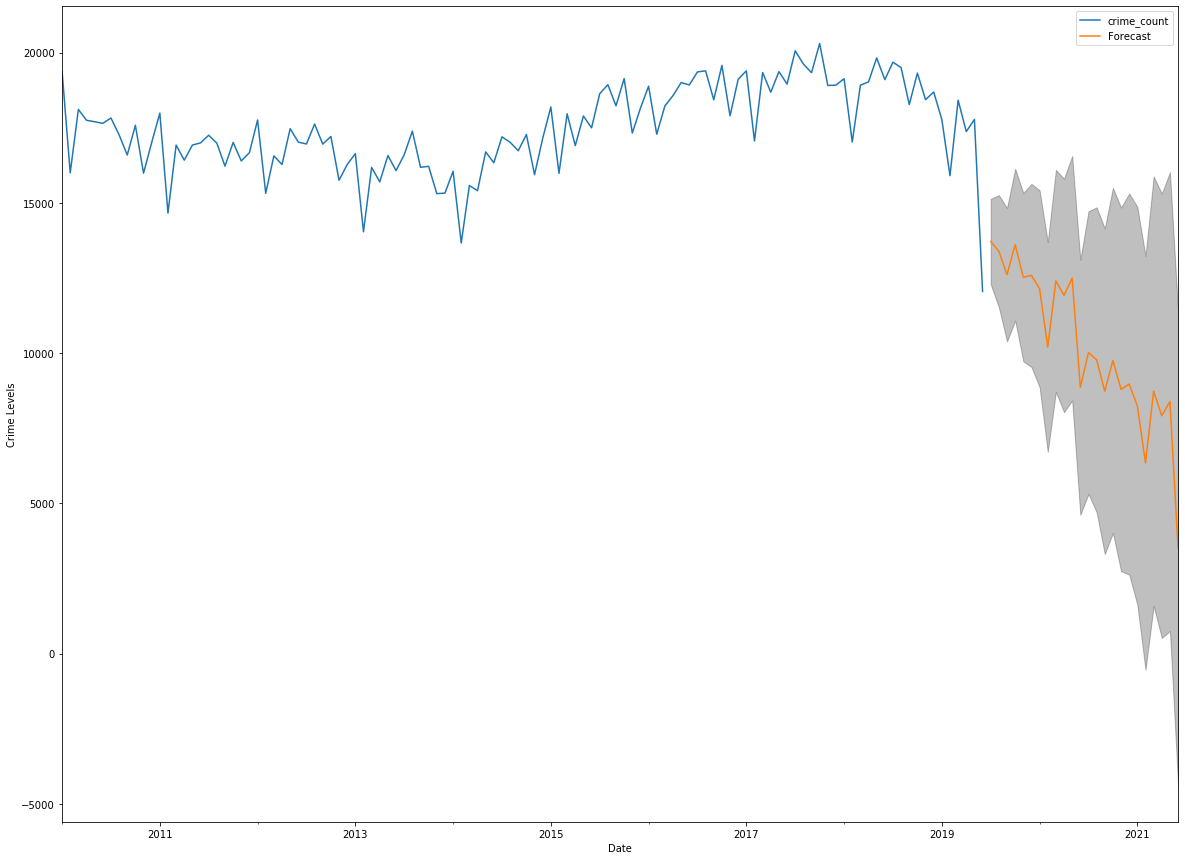

In [131]:
# Plot future predictions with confidence intervals
ax = monthly_crime.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')

plt.legend()
plt.show()